## Wine Quality Prediction - Binary & Multi Class classification - Regularization

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Basic Checks on dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

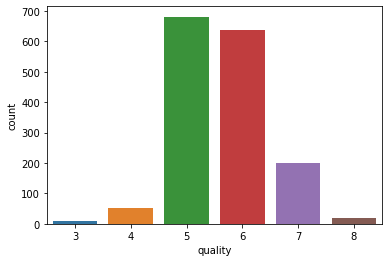

In [5]:
sns.countplot(df['quality'])

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.corr()['quality'].sort_values(ascending= False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Binary_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [12]:
#Null Value Analysis:

df.isna().sum().sum()

0

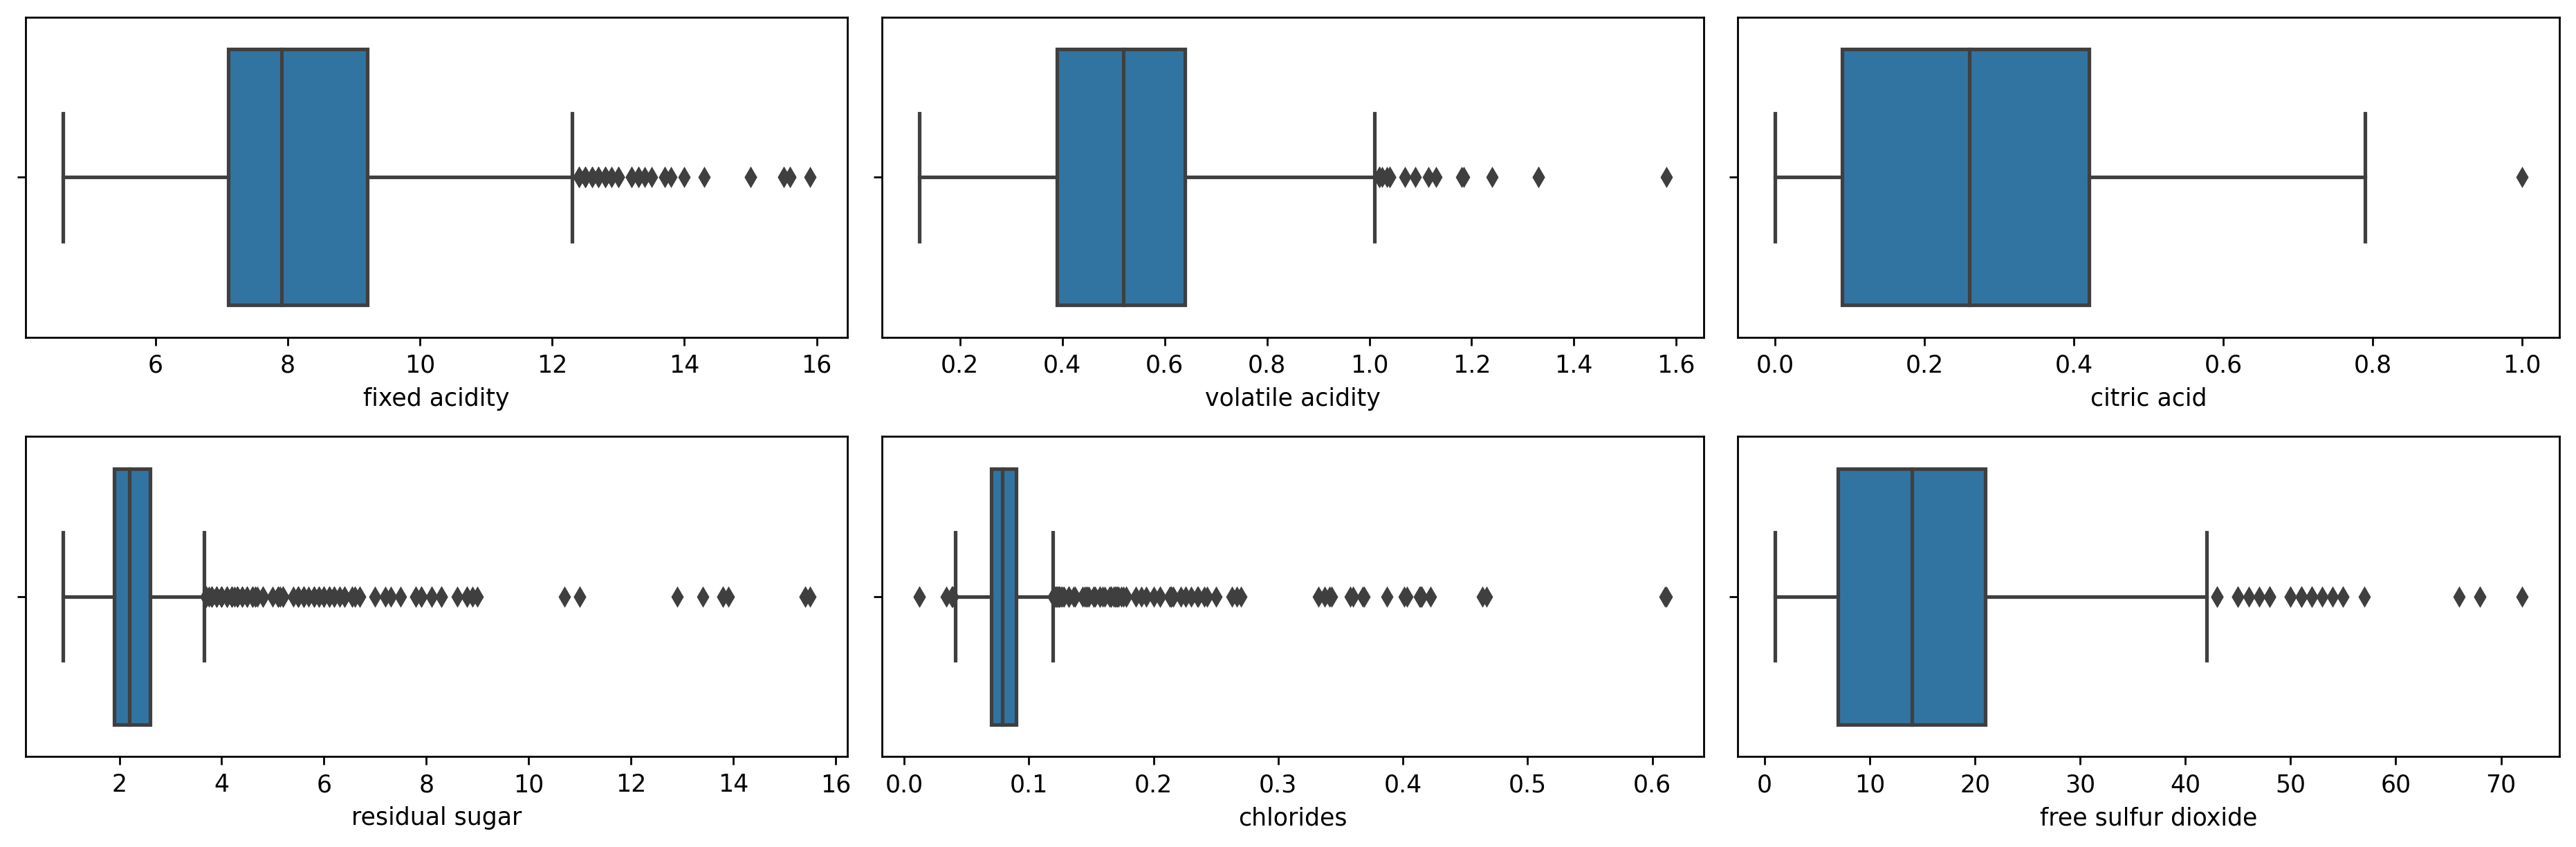

In [14]:
# Visualization on features:

fig,axes = plt.subplots(2,3,figsize = (15,5),dpi=250)

sns.boxplot(x=df['fixed acidity'],ax=axes[0,0])
sns.boxplot(x=df['volatile acidity'],ax=axes[0,1])
sns.boxplot(x=df['citric acid'],ax=axes[0,2])
sns.boxplot(x=df['residual sugar'],ax=axes[1,0])
sns.boxplot(x=df['chlorides'],ax=axes[1,1])
sns.boxplot(x=df['free sulfur dioxide'],ax=axes[1,2])


plt.tight_layout()

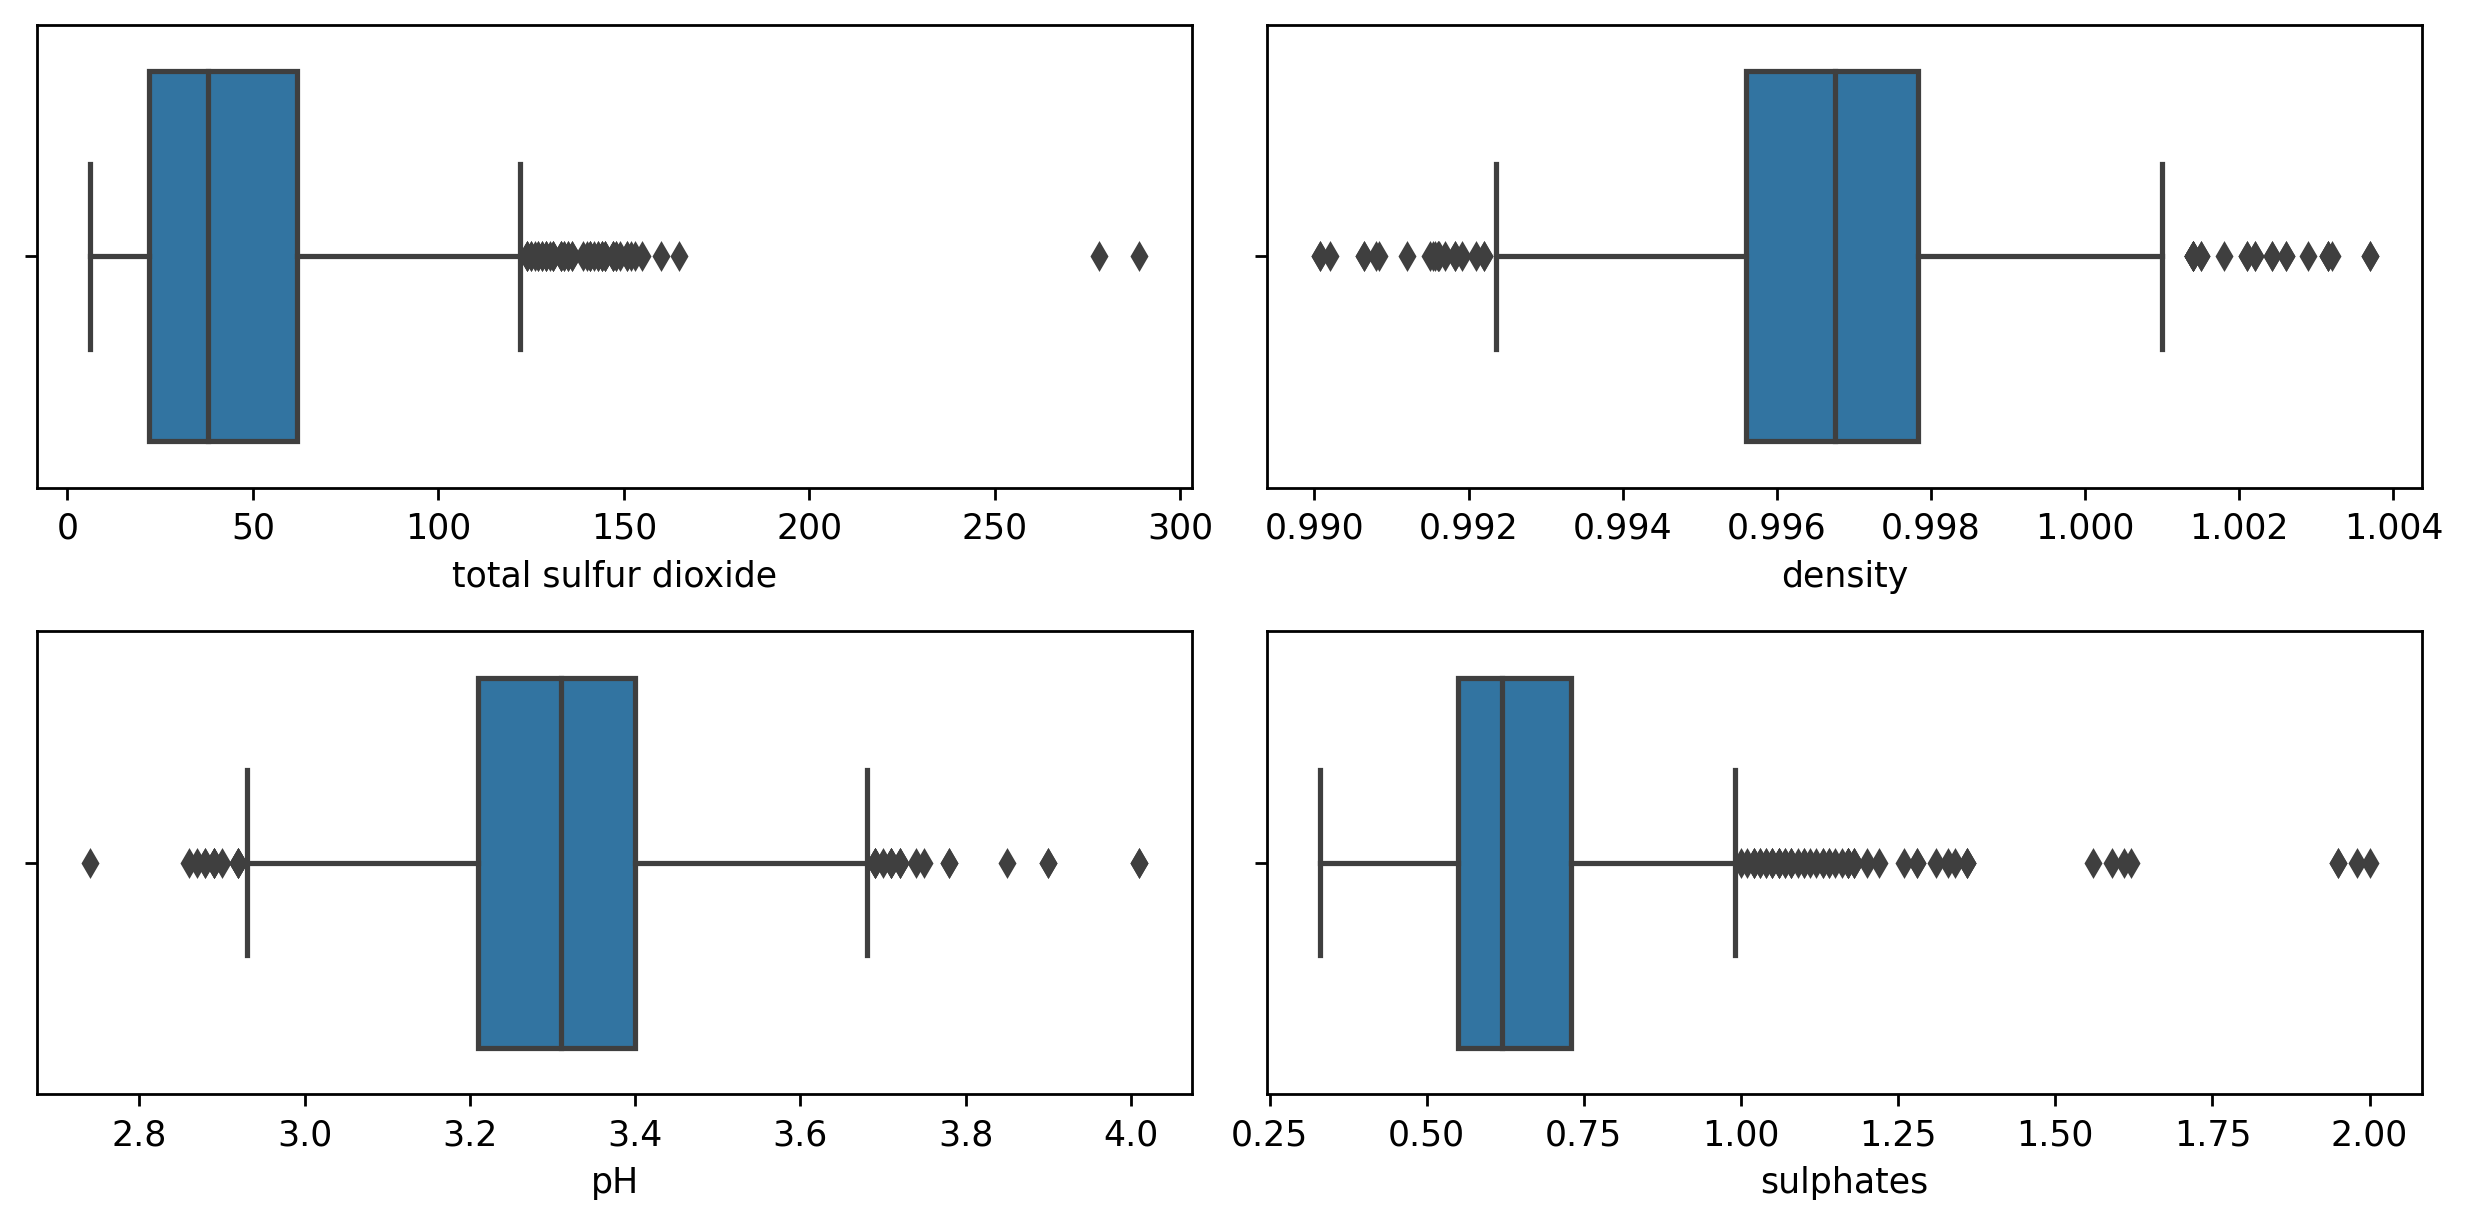

In [15]:
fig,axes = plt.subplots(2,2,figsize = (10,5),dpi=250)
sns.boxplot(x=df['total sulfur dioxide'],ax=axes[0,0])
sns.boxplot(x=df['density'],ax=axes[0,1])
sns.boxplot(x=df['pH'],ax=axes[1,0])
sns.boxplot(x=df['sulphates'],ax=axes[1,1])
plt.tight_layout()

### Binary and Multi Class Creation:

In [99]:
#encoding the best quality as 1 when quality is greater than 6 else 0

df['Binary_quality'] = [1 if x>6 else 0 for x in df['quality']]

In [98]:
def multi_encoding(x):
    if (x>=3) and (x<=4):
        return 'Worse'
    if (x>=5) and (x<=6):
        return 'Better'
    if (x>=6) and (x<=8):
        return 'Best'

In [97]:
df['multi_quality'] = df['quality'].apply(multi_encoding)

### Binary Class Classification:

In [100]:
df['Binary_quality'].value_counts()

0    1382
1     217
Name: Binary_quality, dtype: int64

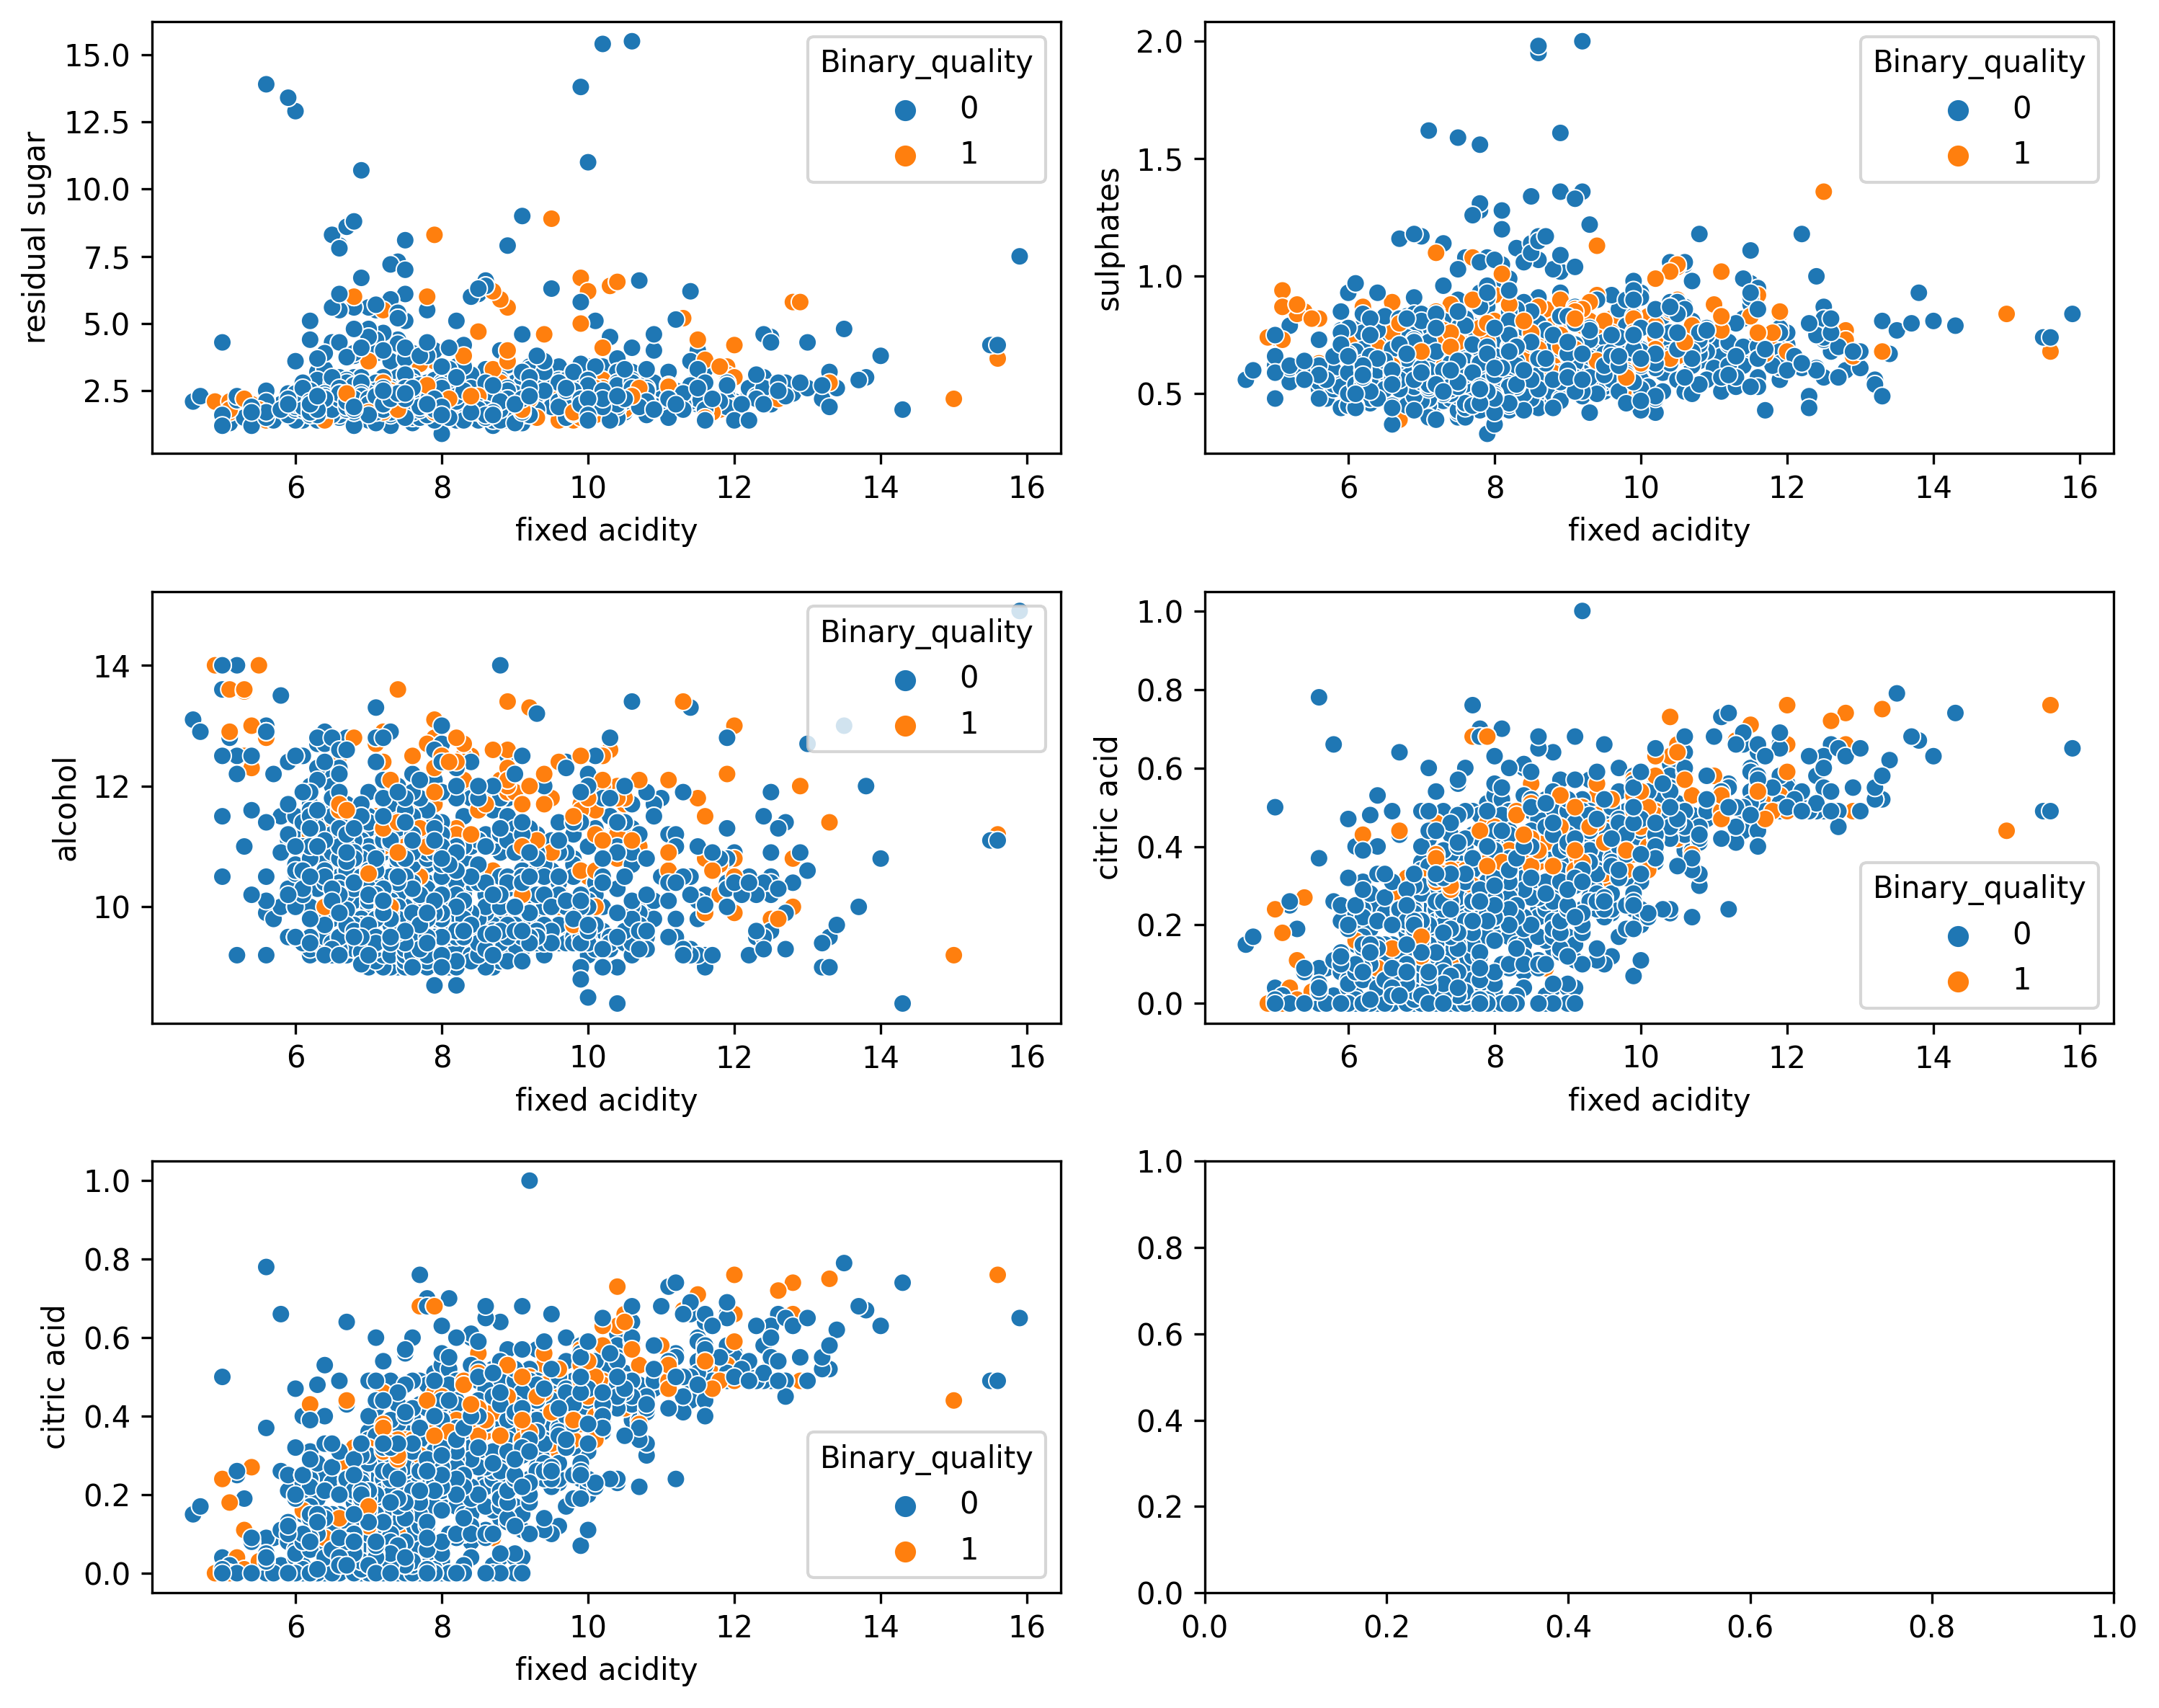

In [101]:
fig,axes = plt.subplots(3,2,figsize=(10,8),dpi=300)
sns.scatterplot(ax=axes[0,0],x = df['fixed acidity'],y = df['residual sugar'],hue = df['Binary_quality'],alpha = 1)
sns.scatterplot(x = df['fixed acidity'],y = df['sulphates'],hue = df['Binary_quality'],alpha = 1,ax=axes[0,1])
sns.scatterplot(x = df['fixed acidity'],y = df['alcohol'],data=df,hue = df['Binary_quality'],alpha = 1,ax=axes[1,0])
sns.scatterplot(x = df['fixed acidity'],y = df['citric acid'],data=df,hue = df['Binary_quality'],alpha = 1,ax=axes[1,1])
sns.scatterplot(x = df['fixed acidity'],y = df['citric acid'],data=df,hue = df['Binary_quality'],alpha = 1,ax=axes[2,0])

plt.tight_layout()

In [102]:
x = df.drop(['quality','Binary_quality','multi_quality'],axis=1)
y = df['Binary_quality']

### Data Seperation:

In [103]:
from sklearn.model_selection import train_test_split

# Split the train test data on 8:2 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


### Preprocessing the data:

In [104]:
from sklearn.preprocessing import StandardScaler

#Preprocessing the data using Standard Scaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

### Logistic Regression with default parameter:

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

#Invoking Logistic Regression
model = LogisticRegression(max_iter=200) # increasing the default value with 100 to avoid warnings
model.fit(scaled_x_train,y_train)

#Predicting with scaled x test
y_pred = model.predict(scaled_x_test)

### Performance metrics:

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_auc_score

#Performance Metrics
print(f'Accuracy Score :  {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification Report : \n  {classification_report(y_test,y_pred)}')


Accuracy Score :  0.85
Confusion Matrix : 
 [[261  17]
 [ 31  11]]
Classification Report : 
                precision    recall  f1-score   support

           0       0.89      0.94      0.92       278
           1       0.39      0.26      0.31        42

    accuracy                           0.85       320
   macro avg       0.64      0.60      0.62       320
weighted avg       0.83      0.85      0.84       320



### Binary class classification with GridSearchCV

In [107]:
# Grid Search 

from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1', 'l2'],
             'C' :np.logspace(0, 1, 10)}

new_model = LogisticRegression(solver = 'saga',max_iter=200)
grid_model = GridSearchCV(estimator=new_model,param_grid=param_grid,cv=5,scoring='accuracy')

#Model fitting on scaled data:
grid_model.fit(scaled_x_train,y_train)


#Best Params
grid_model.best_params_

#Predict on scaled data
y_predict = grid_model.predict(scaled_x_test)

#Performance Metrics
print(f'Accuracy Score :  {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test,y_predict)}')
print(f'Classification Report : \n  {classification_report(y_test,y_predict)}')
grid_model.best_params_

Accuracy Score :  0.85
Confusion Matrix : 
 [[261  17]
 [ 31  11]]
Classification Report : 
                precision    recall  f1-score   support

           0       0.89      0.94      0.92       278
           1       0.39      0.26      0.31        42

    accuracy                           0.85       320
   macro avg       0.64      0.60      0.62       320
weighted avg       0.83      0.85      0.84       320



{'C': 1.0, 'penalty': 'l1'}

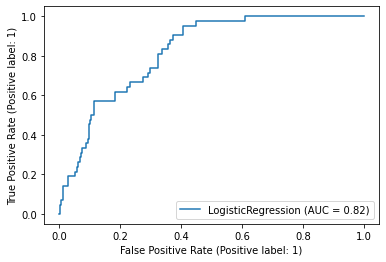

In [108]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model,scaled_x_test,y_test)

### Multi Class Classification:

c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='multi_quality', ylabel='count'>

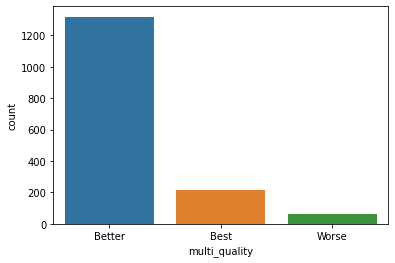

In [109]:
sns.countplot(df['multi_quality'])

In [110]:
df['multi_quality'].value_counts()

Better    1319
Best       217
Worse       63
Name: multi_quality, dtype: int64

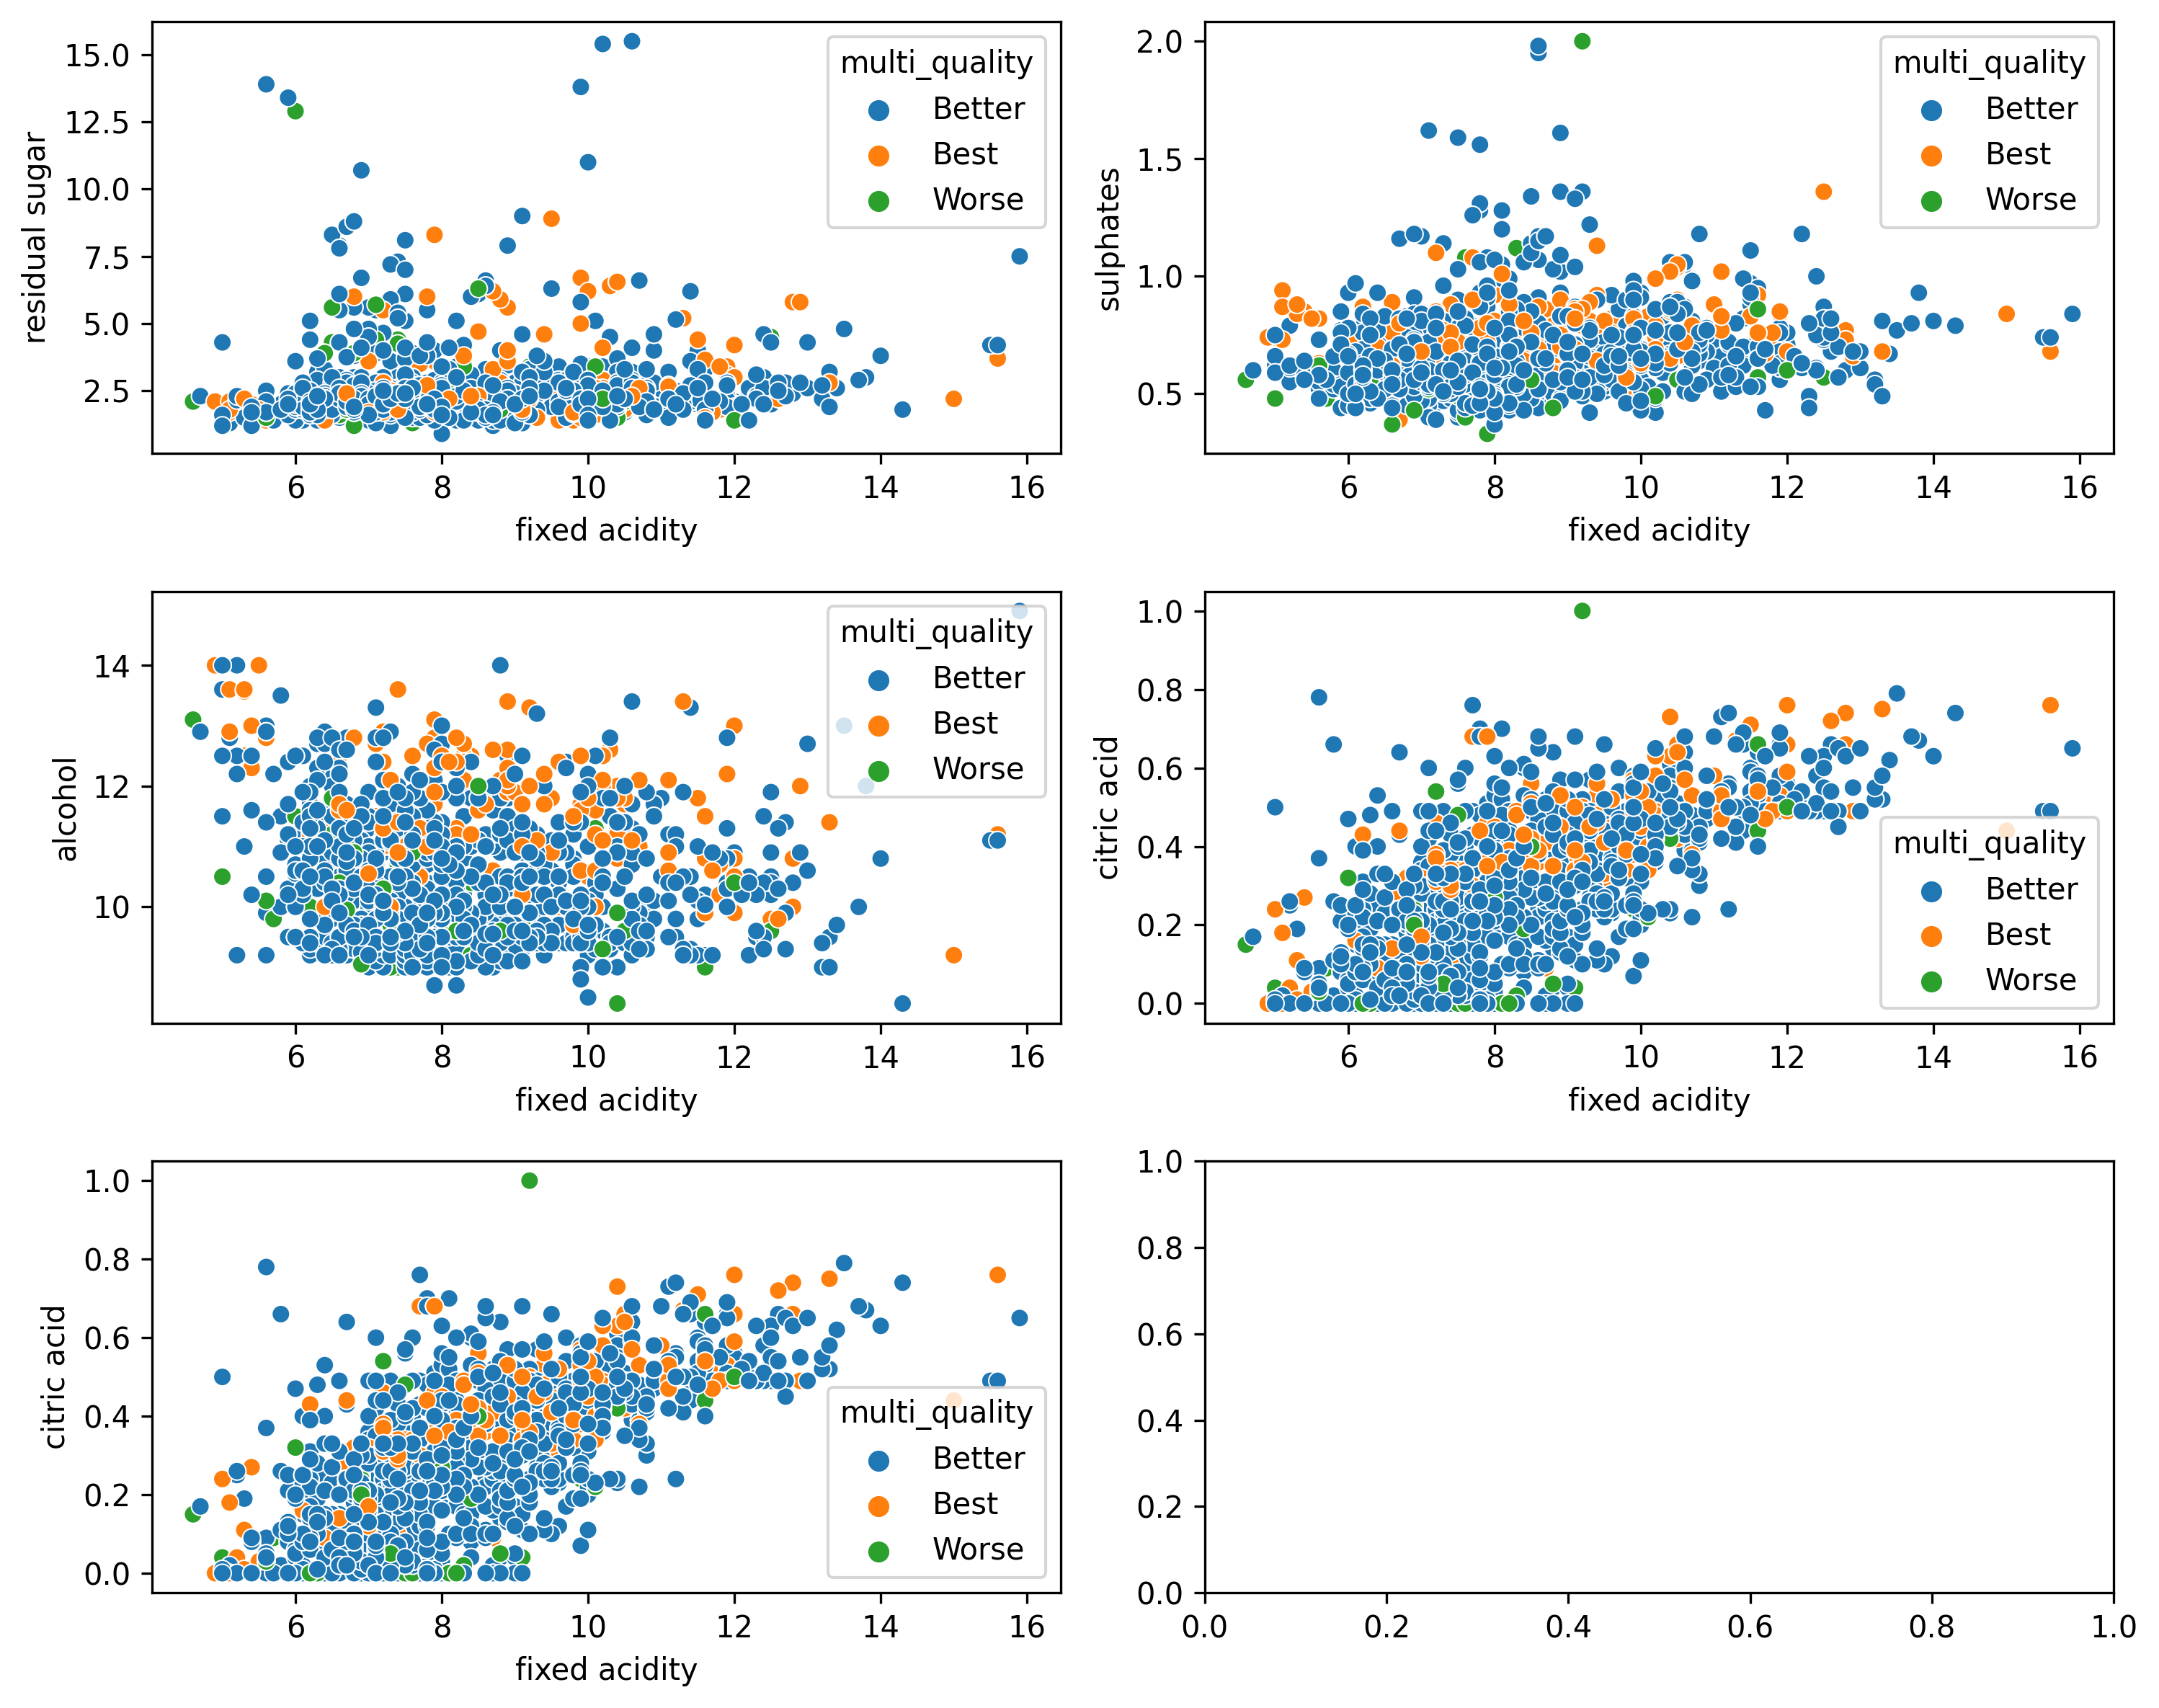

In [111]:
fig,axes = plt.subplots(3,2,figsize=(10,8),dpi=300)
sns.scatterplot(ax=axes[0,0],x = df['fixed acidity'],y = df['residual sugar'],hue = df['multi_quality'],alpha = 1)
sns.scatterplot(x = df['fixed acidity'],y = df['sulphates'],hue = df['multi_quality'],alpha = 1,ax=axes[0,1])
sns.scatterplot(x = df['fixed acidity'],y = df['alcohol'],data=df,hue = df['multi_quality'],alpha = 1,ax=axes[1,0])
sns.scatterplot(x = df['fixed acidity'],y = df['citric acid'],data=df,hue = df['multi_quality'],alpha = 1,ax=axes[1,1])
sns.scatterplot(x = df['fixed acidity'],y = df['citric acid'],data=df,hue = df['multi_quality'],alpha = 1,ax=axes[2,0])

plt.tight_layout()

In [121]:
x = df.drop(['quality','multi_quality','Binary_quality'],axis =1)
y = df['multi_quality']
y

0       Better
1       Better
2       Better
3       Better
4       Better
         ...  
1594    Better
1595    Better
1596    Better
1597    Better
1598    Better
Name: multi_quality, Length: 1599, dtype: object

### Multi class classification with default Logistic Regression:

In [122]:
# Split the train test data on 8:2 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

#Preprocessing the data using Standard Scaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

#Invoking Logistic Regression
model = LogisticRegression()
model.fit(scaled_x_train,y_train)

#Predicting with scaled x test
y_pred = model.predict(scaled_x_test)

#Performance Metrics
print(f'Accuracy Score :  {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test,y_pred)}')
print(f'Classification Report : \n  {classification_report(y_test,y_pred)}')
model.coef_


Accuracy Score :  0.79375
Confusion Matrix : 
 [[ 11  31   0]
 [ 17 243   0]
 [  1  17   0]]
Classification Report : 
                precision    recall  f1-score   support

        Best       0.38      0.26      0.31        42
      Better       0.84      0.93      0.88       260
       Worse       0.00      0.00      0.00        18

    accuracy                           0.79       320
   macro avg       0.40      0.40      0.40       320
weighted avg       0.73      0.79      0.76       320



c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

array([[ 0.18800722, -0.58893803,  0.05443225,  0.09661089, -0.40262891,
         0.08859327, -0.20562102, -0.09795366, -0.17091887,  0.49500729,
         0.77500982],
       [-0.46780401, -0.13781088, -0.20611656, -0.26989101,  0.05456019,
        -0.07306853,  0.38202588,  0.52106499, -0.32120368, -0.1987647 ,
        -0.00934155],
       [ 0.27979679,  0.72674891,  0.15168431,  0.17328012,  0.34806873,
        -0.01552474, -0.17640486, -0.42311132,  0.49212256, -0.29624258,
        -0.76566827]])

### Multi class classification - Logistic Regression with GridSearchCV:

In [125]:
param_grid = {'penalty':['l1','l2'],
             'C':np.logspace(0, 1, 10)}


# Split the train test data on 8:2 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

#Preprocessing the data using Standard Scaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

#Invoking Logistic Regression
model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=1000)


grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_model.fit(scaled_x_train,y_train)
ypred = grid_model.predict(scaled_x_test)


#Performance Metrics
print(f'Accuracy Score :  {accuracy_score(y_test,ypred)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test,ypred)}')
print(f'Classification Report : \n  {classification_report(y_test,ypred)}')
print(grid_model.best_params_)


Accuracy Score :  0.8
Confusion Matrix : 
 [[  9  33   0]
 [ 13 247   0]
 [  1  17   0]]
Classification Report : 
                precision    recall  f1-score   support

        Best       0.39      0.21      0.28        42
      Better       0.83      0.95      0.89       260
       Worse       0.00      0.00      0.00        18

    accuracy                           0.80       320
   macro avg       0.41      0.39      0.39       320
weighted avg       0.73      0.80      0.76       320

{'C': 1.0, 'penalty': 'l2'}


c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ramya.c.murugesan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

### Prediction on Future Data :) 

In [126]:
grid_model.classes_

array(['Best', 'Better', 'Worse'], dtype=object)

In [134]:
pred = [[13.4,0.30,0.60,2.5,0.090,15.0,38.0,0.8978,2.51,0.76,13.4]]

print(f'Probability of prediction data points on each class : {grid_model.predict_proba(pred)}')
print(f'Prediction data belong to class : {grid_model.predict(pred)}')

Probability of prediction data points on each class : [[8.55514977e-02 9.14448502e-01 7.23333884e-11]]
Prediction data belong to class : ['Better']
